 # project: 고양이 수염 스티커 만들기

## library import

In [7]:
import cv2 # opencv
import matplotlib.pyplot as plt
import numpy as np

import dlib # face landmark localization

import os

## img data import

In [59]:
#img path
img_path= "./imgs/s1.jpg"
mushtache_path= "./imgs/05-cat_m.png"

#img read
img_origin_target = cv2.imread(img_path)
img_origin_mushtache = cv2.imread(mushtache_path)

img_show = img_origin_target.copy() # 출력용 이미지 복사

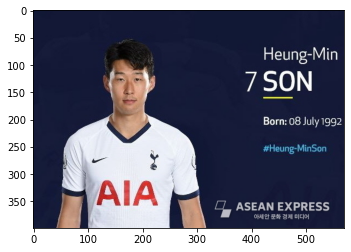

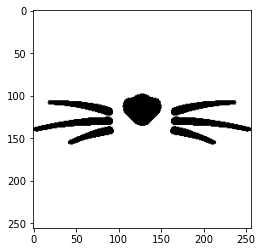

In [60]:
# 이미지 출력
img_rgb = cv2.cvtColor(img_origin_target, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

img_rgb = cv2.cvtColor(img_origin_mushtache, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()


## 얼굴 찾기 face detection

In [61]:
# detector 선언
Detector_HOG = dlib.get_frontal_face_detector()


In [62]:
# bounding box 추출

img_rgb = cv2.cvtColor(img_origin_target, cv2.COLOR_BGR2RGB) # rgb 이미지 

face_rect = Detector_HOG(img_rgb, 1) # 이미지 파라미터

print(face_rect)

rectangles[[(137, 113) (212, 188)]]


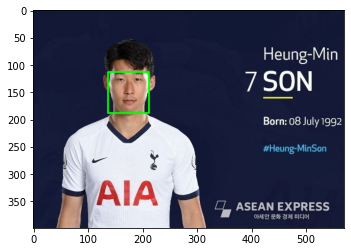

In [63]:
# 

for dlib_rect in face_rect:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 얼굴 점 찍기 face landmark localization

In [64]:
# object kepoin estimation import
# model import

model_path = './data/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


In [65]:
# point 생성.
points = landmark_predictor(img_rgb, face_rect[0])
print("points", points)


# 포인트 색출
list_point = []
list_points = list(map(lambda p: (p.x, p.y), points.parts())) # x,y 좌표 셋트로
list_point.append(list_points)

print("\n-포인트 좌표들-")
print(list_point)
print("\n")
print(len(list_point[0]))


points <_dlib_pybind11.full_object_detection object at 0x7f3c207645f0>

-포인트 좌표들-
[[(140, 131), (141, 141), (142, 151), (144, 160), (147, 170), (153, 178), (160, 185), (169, 189), (178, 190), (187, 188), (195, 183), (201, 175), (205, 167), (208, 158), (209, 148), (210, 138), (210, 128), (146, 119), (150, 115), (157, 113), (163, 114), (169, 116), (181, 116), (187, 114), (193, 113), (199, 114), (203, 118), (176, 127), (177, 134), (177, 141), (177, 148), (170, 154), (174, 155), (177, 155), (180, 155), (183, 154), (154, 127), (158, 125), (163, 126), (166, 129), (162, 129), (158, 129), (185, 129), (189, 126), (193, 126), (197, 128), (193, 130), (189, 130), (164, 166), (169, 164), (174, 163), (177, 164), (180, 163), (184, 164), (188, 166), (184, 170), (180, 171), (176, 172), (173, 171), (169, 170), (166, 166), (174, 166), (177, 167), (180, 167), (186, 166), (180, 167), (177, 167), (173, 167)]]


68


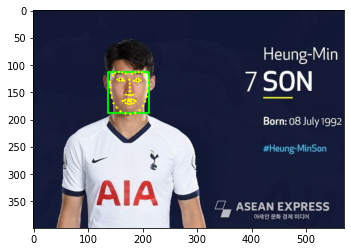

In [66]:
# 사진에 point 까지 찍기
#사진에 점찍기....


for idx, point in enumerate(list_points):
    cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 스티커 적용 위치 
- [hint] 2, 36, 48, 30 번 인덱스를 이용
![](./imgs/03-dll.png)

In [67]:
## 33 51
print("dlib_rects", face_rect)
print("list_landmarks", list_points)

print()

print(list_points[33], list_points[51]) #  코랑 입술 사이
x = np.mean((list_points[33][0],list_points[51][0]))
y = np.mean((list_points[33][1],list_points[51][1]))
x, y

dlib_rects rectangles[[(137, 113) (212, 188)]]
list_landmarks [(140, 131), (141, 141), (142, 151), (144, 160), (147, 170), (153, 178), (160, 185), (169, 189), (178, 190), (187, 188), (195, 183), (201, 175), (205, 167), (208, 158), (209, 148), (210, 138), (210, 128), (146, 119), (150, 115), (157, 113), (163, 114), (169, 116), (181, 116), (187, 114), (193, 113), (199, 114), (203, 118), (176, 127), (177, 134), (177, 141), (177, 148), (170, 154), (174, 155), (177, 155), (180, 155), (183, 154), (154, 127), (158, 125), (163, 126), (166, 129), (162, 129), (158, 129), (185, 129), (189, 126), (193, 126), (197, 128), (193, 130), (189, 130), (164, 166), (169, 164), (174, 163), (177, 164), (180, 163), (184, 164), (188, 166), (184, 170), (180, 171), (176, 172), (173, 171), (169, 170), (166, 166), (174, 166), (177, 167), (180, 167), (186, 166), (180, 167), (177, 167), (173, 167)]

(177, 155) (177, 164)


(177.0, 159.5)

In [45]:
## 콧수염 리사이즈
# 입슬과 코사이 => hight
# 입술 width => width

print("원래크기: ",img_origin_mushtache.shape)
img_risize_mushtache = cv2.resize(img_origin_mushtache, ( ,  ))

print("resize: ",img_risize_mushtache.shape)


SyntaxError: invalid syntax (<ipython-input-45-12de0d60fe6f>, line 2)

## 스티커 붙이기

In [ ]:
mushtache_area = img_bgr[refined_y:img_risize_mushtache.shape[0], refined_x:refined_x+img_risize_mushtache.shape[1]]

img_bgr[refined_y:img_risize_mushtache.shape[0], refined_x:refined_x+img_risize_mushtache.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show_rgb, cv2.COLOR_BGR2RGB)) 
plt.show()

In [ ]:
mushtache_area = img_bgr[refined_y:img_risize_mushtache.shape[0], refined_x:refined_x+img_risize_mushtache.shape[1]]

img_bgr[refined_y:img_risize_mushtache.shape[0], refined_x:refined_x+img_risize_mushtache.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_origin_target, cv2.COLOR_BGR2RGB)) 
plt.show()

## 문제 찾기
- 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
- 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
- 실행 속도가 중요할까요?
- 스티커앱을 만들 때 정확도가 얼마나 중요할까요?

# Comment